In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install country_converter
import country_converter as coco
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 2.7 MB/s 
  Created wheel for country-converter: filename=country_converter-0.7.7-py3-none-any.whl size=53786 sha256=548b9d127af258a767189523bac3ed5227829c86d3efbe57a6fd1721c8054b61
  Stored in directory: /root/.cache/pip/wheels/e8/e6/60/61798a8a91462250002293d1c8cc8de90a130119a813277ccc
Successfully built country-converter


Preprocessing Data

In [ ]:
#Checking dataset
data = pd.read_csv('/content/salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Scientist,151800,US,0,US,M
1,2022,SE,FT,Data Scientist,130240,US,0,US,M
2,2022,SE,FT,Analytics Engineer,165000,US,100,US,M
3,2022,SE,FT,Analytics Engineer,140250,US,100,US,M
4,2022,SE,FT,Data Engineer,135000,US,0,US,M


In [ ]:
print("This data set has", data.shape[0], "rows. And", data.shape[1], "columns.")

This data set has 887 rows. And 9 columns.


In [ ]:
#Searching for null data
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

***Salary***

In [ ]:
# Analysis of the target variable
data['salary'].describe()

count       887.000000
mean     120803.183766
std       75388.826931
min       10000.000000
25%       69999.500000
50%      112900.000000
75%      158100.000000
max      900000.000000
Name: salary, dtype: float64

The data seems to have outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


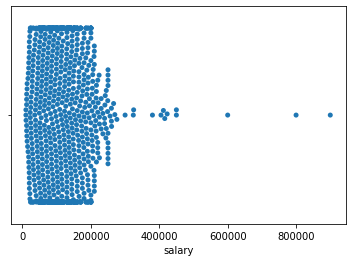

In [ ]:
sns.swarmplot(data['salary'])

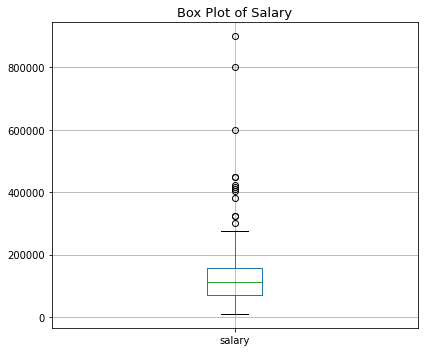

In [ ]:
# Box plt for "Counter Sales" column
data.boxplot(column=["salary"], figsize=(6,5))
plt.title("Box Plot of Salary", fontsize=13)
plt.tight_layout()

In [ ]:
#Getting rid of outliers
#Calculating the three quartiles
Q1 = np.percentile(data["salary"], 25, interpolation = 'midpoint')
Q2 = np.percentile(data["salary"], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data["salary"], 75, interpolation = 'midpoint')
IQR = Q3 - Q1 #Calculating inter-quartile range
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('Lower limit is', low_lim)
print('Upper limit is', up_lim)
outlier =[]
for x in data["salary"]:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' The outliers in the dataset are', outlier) #Printing outliers
data.drop(data[data['salary'] >= 324000].index, inplace = True) #Dropping outliers

Interquartile range is 88100.5
Lower limit is -62151.25
Upper limit is 290250.75
 The outliers in the dataset are [900000, 800000, 300000, 324000, 405000, 380000, 450000, 450000, 416000, 325000, 600000, 423000, 412000]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


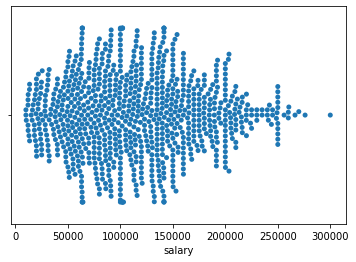

In [ ]:
sns.swarmplot(data['salary'])

***Work Year***

In [ ]:
data['work_year'].value_counts()

2022    587
2021    216
2020     72
Name: work_year, dtype: int64

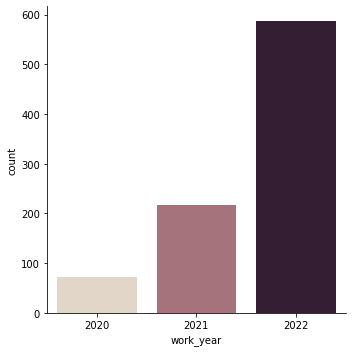

In [ ]:
sns.catplot(data=data, x="work_year", kind="count", palette="ch:.25")

work_year is the year when the salary was paid and we consider it is not relevant, so we drop it from the data base.

In [ ]:
data = data.drop('work_year', axis=1)

***Employment Type***

In [ ]:
data['employment_type'].value_counts()

FT    855
PT     11
FL      5
CT      4
Name: employment_type, dtype: int64

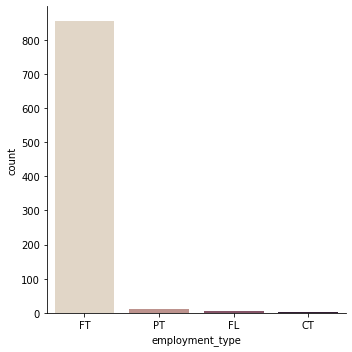

In [ ]:
sns.catplot(data=data, x="employment_type", kind="count", palette="ch:.25")

In [ ]:
#distribution of values in the data
data['employment_type'].value_counts(normalize=True) * 100

FT    97.714286
PT     1.257143
FL     0.571429
CT     0.457143
Name: employment_type, dtype: float64

The employment type is very unbalanced where almost 98% of values are FT (Full time) jobs, so we decided to drop the column because is not a relevant variable for the analysis.

In [ ]:
data = data.drop('employment_type', axis=1)

***Company Location and Employee Residence***

In [ ]:
print("Company Location has",data['company_location'].nunique(),"unique values.")
print("Employee residence has",data['employee_residence'].nunique(),"unique values.")

Company Location has 55 unique values.
Employee residence has 60 unique values.


In [ ]:
#distribution of values in the data
data['company_location'].value_counts(normalize=True) * 100

US    63.657143
GB     8.228571
CA     3.657143
DE     3.542857
IN     3.428571
FR     1.942857
ES     1.942857
GR     1.485714
NL     0.914286
PT     0.685714
JP     0.685714
AU     0.571429
BR     0.571429
AT     0.571429
PL     0.457143
DK     0.457143
BE     0.457143
TR     0.457143
MX     0.342857
AE     0.342857
LU     0.342857
PK     0.342857
CH     0.228571
CZ     0.228571
RU     0.228571
CN     0.228571
NG     0.228571
SI     0.228571
PR     0.228571
IT     0.228571
SG     0.228571
ID     0.228571
HU     0.114286
IL     0.114286
HR     0.114286
AS     0.114286
VN     0.114286
MD     0.114286
CL     0.114286
IR     0.114286
NZ     0.114286
CO     0.114286
KE     0.114286
MY     0.114286
PH     0.114286
EE     0.114286
UA     0.114286
AR     0.114286
IQ     0.114286
RO     0.114286
DZ     0.114286
EG     0.114286
HN     0.114286
IE     0.114286
MT     0.114286
Name: company_location, dtype: float64

The database has salaries in 55 countries, and the data seams very unbalanced with more than 70% in just 2 of the values. So we decided to convert the country to continents.

In [ ]:
# We convert the country location to continent to use it in the analysis
data['employee_residence'] = coco.convert(names=data['employee_residence'], to='name')
data['company_location'] = coco.convert(names=data['company_location'], to='name')
data['employee_residence'] = coco.convert(data['employee_residence'], to = 'continent')
data['company_location'] = coco.convert(data['company_location'], to = 'continent')
data.head()

,experience_level,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,SE,Data Scientist,151800,America,0,America,M
1,SE,Data Scientist,130240,America,0,America,M
2,SE,Analytics Engineer,165000,America,100,America,M
3,SE,Analytics Engineer,140250,America,100,America,M
4,SE,Data Engineer,135000,America,0,America,M


In [ ]:
data['company_location'].value_counts()

America    603
Europe     202
Asia        58
Oceania      7
Africa       5
Name: company_location, dtype: int64

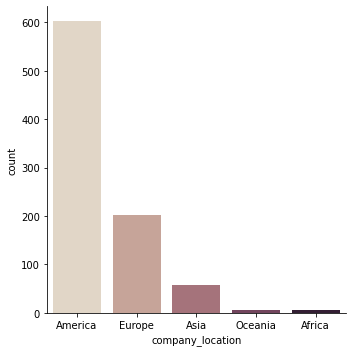

In [ ]:
sns.catplot(data=data, x="company_location", kind="count", palette="ch:.25")

In [ ]:
data['employee_residence'].value_counts()

America    585
Europe     207
Asia        71
Oceania      6
Africa       6
Name: employee_residence, dtype: int64

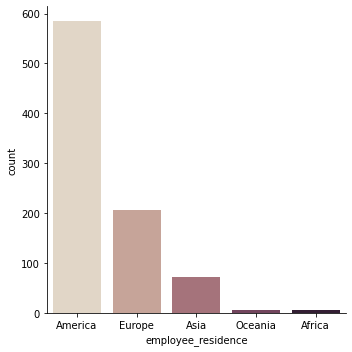

In [ ]:
sns.catplot(data=data, x="employee_residence", kind="count", palette="ch:.25")

 ***Company Size***

In [ ]:
data['company_size'].value_counts()

M    527
L    249
S     99
Name: company_size, dtype: int64

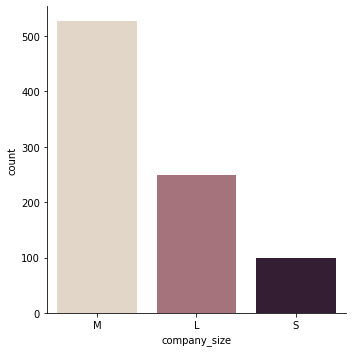

In [ ]:
sns.catplot(data=data, x="company_size", kind="count", palette="ch:.25")

In [ ]:
enc = OrdinalEncoder()
cs = [['S', 1], ['M', 2], ['L', 3]]
enc.fit(cs)
data["company_size"] = enc.fit_transform(data[["company_size"]])

***Remote Ratio***


In [ ]:
data['remote_ratio'].value_counts()

100    530
0      230
50     115
Name: remote_ratio, dtype: int64

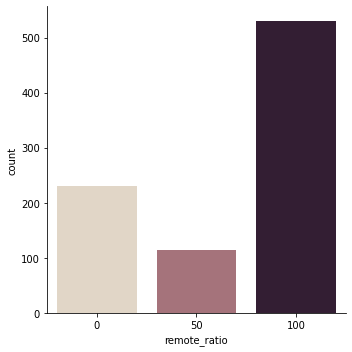

In [ ]:
sns.catplot(data=data, x="remote_ratio", kind="count", palette="ch:.25")

In [ ]:
# the remote_ratio is also Ordinal data so we use the Ordinal encoded
rr = [[0, 1], [50, 2], [100, 3]]
enc.fit(rr)
data["remote_ratio"] = enc.fit_transform(data[["remote_ratio"]])

***Experience Level***

In [ ]:
data['experience_level'].value_counts()

SE    465
MI    264
EN    116
EX     30
Name: experience_level, dtype: int64

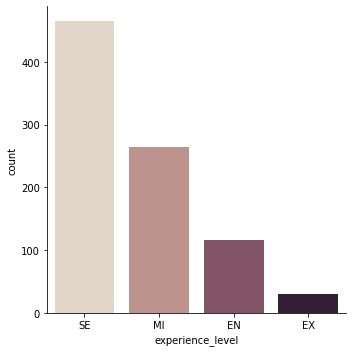

In [ ]:
sns.catplot(data=data, x="experience_level", kind="count", palette="ch:.25")

In [ ]:
wy = [['EN', 1], ['MI', 2], ['SE', 3], ['EX', 4]]
enc.fit(wy)
data["experience_level"] = enc.fit_transform(data[["experience_level"]])

***Job Title***

In [ ]:
print("Job Title has",data['job_title'].nunique(),"unique values.")

Job Title has 52 unique values.


In [ ]:
data['job_title'].value_counts()

Data Scientist                              215
Data Engineer                               197
Data Analyst                                130
Machine Learning Engineer                    66
Data Science Manager                         25
Analytics Engineer                           24
Data Architect                               17
Research Scientist                           17
Machine Learning Scientist                   13
AI Scientist                                 10
BI Data Analyst                               9
ML Engineer                                   8
Big Data Engineer                             8
Applied Machine Learning Scientist            7
Data Analytics Manager                        7
Data Science Consultant                       7
Business Data Analyst                         6
Director of Data Science                      6
Computer Vision Engineer                      6
Principal Data Scientist                      6
ETL Developer                           

We decided to create the category others to add all the categories with less than 9 values and use it in the model.

In [ ]:
data.loc[data['job_title'].isin((data['job_title'].value_counts()[data['job_title'].value_counts() < 10]).index), 'job_title'] = 'other'
data['job_title'].value_counts()

Data Scientist                215
Data Engineer                 197
other                         161
Data Analyst                  130
Machine Learning Engineer      66
Data Science Manager           25
Analytics Engineer             24
Research Scientist             17
Data Architect                 17
Machine Learning Scientist     13
AI Scientist                   10
Name: job_title, dtype: int64

In [ ]:
print("Job Title has",data['job_title'].nunique(),"unique values.")

Job Title has 52 unique values.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

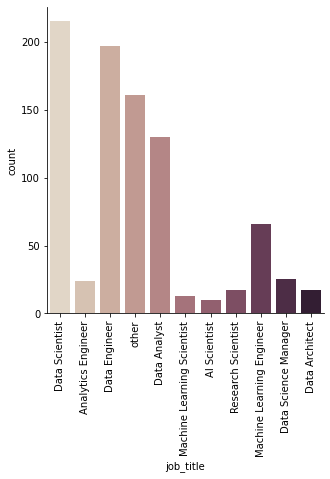

In [ ]:

sns.catplot(data=data, x="job_title", kind="count", palette="ch:.25")
plt.xticks(rotation=90)

In [ ]:
data.head()

,experience_level,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,3.0,Data Scientist,151800,America,0.0,America,1.0
1,3.0,Data Scientist,130240,America,0.0,America,1.0
2,3.0,Analytics Engineer,165000,America,2.0,America,1.0
3,3.0,Analytics Engineer,140250,America,2.0,America,1.0
4,3.0,Data Engineer,135000,America,0.0,America,1.0


Creating dummies for the categorical variables.

In [ ]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,experience_level,salary,remote_ratio,company_size,job_title_Analytics Engineer,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Science Manager,job_title_Data Scientist,...,job_title_Research Scientist,job_title_other,employee_residence_America,employee_residence_Asia,employee_residence_Europe,employee_residence_Oceania,company_location_America,company_location_Asia,company_location_Europe,company_location_Oceania
0,3.0,151800,0.0,1.0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1,3.0,130240,0.0,1.0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,3.0,165000,2.0,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,3.0,140250,2.0,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,3.0,135000,0.0,1.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


**Splitting the dataset into Training, Testing and Validation**

In [ ]:
#Organizing and splitting data
y = data['salary']
x = data.drop(data[['salary']], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.10)

In [ ]:
print("Shape Testing dataset")
print("Y:", y_test.shape)
print("X:", X_test.shape)
print()
print("Shape Training dataset")
print("Y:", y_train.shape)
print("X:", X_train.shape)
print()
print("Shape Validation dataset")
print("Y:", y_val.shape)
print("X:", X_val.shape)

Shape Testing dataset
Y: (175,)
X: (175, 21)

Shape Training dataset
Y: (630,)
X: (630, 21)

Shape Validation dataset
Y: (70,)
X: (70, 21)


In [ ]:
X_test.columns

Index(['experience_level', 'remote_ratio', 'company_size',
       'job_title_Analytics Engineer', 'job_title_Data Analyst',
       'job_title_Data Architect', 'job_title_Data Engineer',
       'job_title_Data Science Manager', 'job_title_Data Scientist',
       'job_title_Machine Learning Engineer',
       'job_title_Machine Learning Scientist', 'job_title_Research Scientist',
       'job_title_other', 'employee_residence_America',
       'employee_residence_Asia', 'employee_residence_Europe',
       'employee_residence_Oceania', 'company_location_America',
       'company_location_Asia', 'company_location_Europe',
       'company_location_Oceania'],
      dtype='object')

In [ ]:
X_test.head()

,experience_level,remote_ratio,company_size,job_title_Analytics Engineer,job_title_Data Analyst,job_title_Data Architect,job_title_Data Engineer,job_title_Data Science Manager,job_title_Data Scientist,job_title_Machine Learning Engineer,...,job_title_Research Scientist,job_title_other,employee_residence_America,employee_residence_Asia,employee_residence_Europe,employee_residence_Oceania,company_location_America,company_location_Asia,company_location_Europe,company_location_Oceania
473,2.0,0.0,1.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
61,3.0,2.0,1.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
683,1.0,2.0,0.0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
460,3.0,2.0,1.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
685,1.0,1.0,0.0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


# The Neural Network Model

In [ ]:
#Building NN
model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(15, activation='relu', input_dim = x.columns.size),
      tf.keras.layers.Dense(15, activation='relu'),
      tf.keras.layers.Dense(1)
                                    ])

#Copmiling model
model.compile(loss='mse', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
#Training the model
history1 = model.fit(X_train, y_train, epochs=2000, validation_data=(X_val, y_val), callbacks=tf.keras.callbacks.EarlyStopping(patience=5))

Epoch 1/2000
20/20 [==============================] - 1s 12ms/step - loss: 17047750656.0000 - accuracy: 0.0000e+00 - val_loss: 15445412864.0000 - val_accuracy: 0.0000e+00
Epoch 2/2000
20/20 [==============================] - 0s 5ms/step - loss: 17047429120.0000 - accuracy: 0.0000e+00 - val_loss: 15445070848.0000 - val_accuracy: 0.0000e+00
Epoch 3/2000
20/20 [==============================] - 0s 3ms/step - loss: 17046984704.0000 - accuracy: 0.0000e+00 - val_loss: 15444589568.0000 - val_accuracy: 0.0000e+00
Epoch 4/2000
20/20 [==============================] - 0s 3ms/step - loss: 17046372352.0000 - accuracy: 0.0000e+00 - val_loss: 15443930112.0000 - val_accuracy: 0.0000e+00
Epoch 5/2000
20/20 [==============================] - 0s 4ms/step - loss: 17045547008.0000 - accuracy: 0.0000e+00 - val_loss: 15443042304.0000 - val_accuracy: 0.0000e+00
Epoch 6/2000
20/20 [==============================] - 0s 4ms/step - loss: 17044434944.0000 - accuracy: 0.0000e+00 - val_loss: 15441881088.0000 - val_

In [ ]:
print(history1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


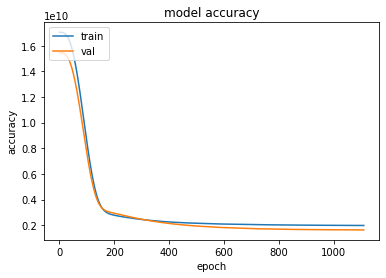

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

MAPE = 41.46

Accuracy = 58.54



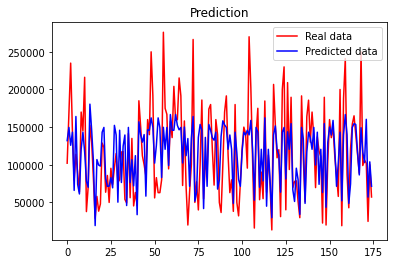

In [ ]:
y_pred1 = model.predict(X_test)
df_pf1 = pd.DataFrame(model.predict(X_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_pf1['Target'] = y_test
df_pf1['Residual'] = df_pf1['Target'] - df_pf1['Prediction']
df_pf1['APE'] = np.absolute(df_pf1['Residual']/df_pf1['Target']*100) # Difference%
print("MAPE =", round(np.mean(df_pf1['APE']), 2))
print()
print("Accuracy =", round(100-np.mean(df_pf1['APE']), 2))
print()
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred1, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

Comparing with other model using Mean Squared Logarithmic Error as the loss function

In [ ]:
#Building NN
model2 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(15, activation='relu', input_dim = x.columns.size),
      tf.keras.layers.Dense(15, activation='relu'),
      tf.keras.layers.Dense(1)
                                    ])
#Copmiling model
model2.compile(loss='msle', optimizer= 'adam')

#Training the model
history2 = model2.fit(X_train, y_train, epochs=2000, validation_data=(X_val, y_val), callbacks=tf.keras.callbacks.EarlyStopping(patience=5))

Epoch 1/2000
20/20 [==============================] - 1s 10ms/step - loss: 116.1822 - val_loss: 110.8883
Epoch 2/2000
20/20 [==============================] - 0s 4ms/step - loss: 109.5185 - val_loss: 104.6023
Epoch 3/2000
20/20 [==============================] - 0s 3ms/step - loss: 103.3825 - val_loss: 98.8267
Epoch 4/2000
20/20 [==============================] - 0s 5ms/step - loss: 97.6509 - val_loss: 93.2915
Epoch 5/2000
20/20 [==============================] - 0s 3ms/step - loss: 92.1769 - val_loss: 87.9759
Epoch 6/2000
20/20 [==============================] - 0s 3ms/step - loss: 86.9898 - val_loss: 82.8996
Epoch 7/2000
20/20 [==============================] - 0s 3ms/step - loss: 81.9223 - val_loss: 77.9110
Epoch 8/2000
20/20 [==============================] - 0s 3ms/step - loss: 77.1026 - val_loss: 73.4632
Epoch 9/2000
20/20 [==============================] - 0s 3ms/step - loss: 72.9151 - val_loss: 69.6592
Epoch 10/2000
20/20 [==============================] - 0s 4ms/step - loss: 6

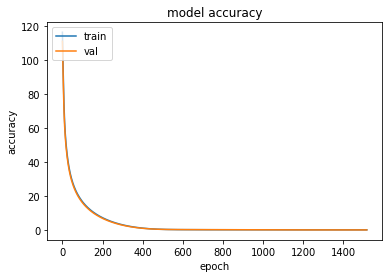

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

MAPE = 37.79

Accuracy = 62.21



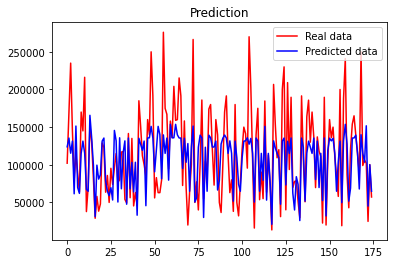

In [ ]:
y_pred = model2.predict(X_test)
df_pf = pd.DataFrame(model2.predict(X_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = y_test
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['APE'] = np.absolute(df_pf['Residual']/df_pf['Target']*100) # Difference%
print("MAPE =", round(np.mean(df_pf['APE']), 2))
print()
print("Accuracy =", round(100-np.mean(df_pf['APE']), 2))
print()
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

Building a model with an extra hidden layer

In [ ]:
#Building NN
model3 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(15, activation='relu', input_dim = x.columns.size),
      tf.keras.layers.Dense(15, activation='relu'),
      tf.keras.layers.Dense(1)
                                    ])
#Copmiling model
model3.compile(loss='msle', optimizer= 'adamax')

#Training the model
model3.fit(X_train, y_train, epochs=3000, validation_data=(X_val, y_val), callbacks=tf.keras.callbacks.EarlyStopping(patience=5))


Epoch 1/3000
20/20 [==============================] - 1s 10ms/step - loss: 117.2054 - val_loss: 112.0618
Epoch 2/3000
20/20 [==============================] - 0s 3ms/step - loss: 111.1234 - val_loss: 106.6286
Epoch 3/3000
20/20 [==============================] - 0s 3ms/step - loss: 106.0276 - val_loss: 101.9333
Epoch 4/3000
20/20 [==============================] - 0s 3ms/step - loss: 101.5287 - val_loss: 97.6864
Epoch 5/3000
20/20 [==============================] - 0s 3ms/step - loss: 97.4137 - val_loss: 93.8045
Epoch 6/3000
20/20 [==============================] - 0s 4ms/step - loss: 93.6351 - val_loss: 90.2285
Epoch 7/3000
20/20 [==============================] - 0s 3ms/step - loss: 90.1120 - val_loss: 86.8911
Epoch 8/3000
20/20 [==============================] - 0s 3ms/step - loss: 86.8442 - val_loss: 83.8011
Epoch 9/3000
20/20 [==============================] - 0s 3ms/step - loss: 83.8197 - val_loss: 80.9618
Epoch 10/3000
20/20 [==============================] - 0s 4ms/step - loss:


MAPE = 38.01

Accuracy = 61.99



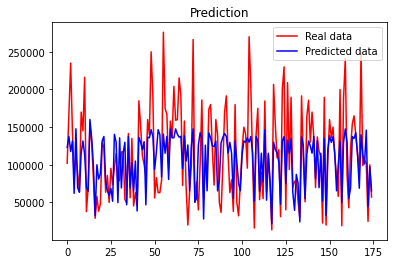

In [ ]:
#Check the model
y_pred = model3.predict(X_test)
df_pf3 = pd.DataFrame(model3.predict(X_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_pf3['Target'] = y_test
df_pf3['Residual'] = df_pf3['Target'] - df_pf3['Prediction']
df_pf3['APE'] = np.absolute(df_pf3['Residual']/df_pf3['Target']*100) # Difference%
print()
print("MAPE =", round(np.mean(df_pf3['APE']), 2))
print()
print("Accuracy =", round(100-np.mean(df_pf3['APE']), 2))
print()
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
#Building NN
model4 = tf.keras.models.Sequential([
      tf.keras.layers.Dense(15, activation='relu', input_dim = x.columns.size),
      tf.keras.layers.Dense(15, activation='relu'),
      tf.keras.layers.Dense(1)
                                    ])
#Copmiling model
model4.compile(loss='msle', optimizer= 'SGD')

#Training the model
model4.fit(X_train, y_train, epochs=3000, validation_data=(X_val, y_val), callbacks=tf.keras.callbacks.EarlyStopping(patience=5))


Streaming output truncated to the last 5000 lines.
20/20 [==============================] - 0s 3ms/step - loss: 0.8734 - val_loss: 0.7967
Epoch 502/3000
20/20 [==============================] - 0s 3ms/step - loss: 0.8715 - val_loss: 0.7948
Epoch 503/3000
20/20 [==============================] - 0s 3ms/step - loss: 0.8695 - val_loss: 0.7930
Epoch 504/3000
20/20 [==============================] - 0s 4ms/step - loss: 0.8675 - val_loss: 0.7912
Epoch 505/3000
20/20 [==============================] - 0s 3ms/step - loss: 0.8656 - val_loss: 0.7894
Epoch 506/3000
20/20 [==============================] - 0s 3ms/step - loss: 0.8636 - val_loss: 0.7876
Epoch 507/3000
20/20 [==============================] - 0s 4ms/step - loss: 0.8617 - val_loss: 0.7858
Epoch 508/3000
20/20 [==============================] - 0s 3ms/step - loss: 0.8597 - val_loss: 0.7840
Epoch 509/3000
20/20 [==============================] - 0s 3ms/step - loss: 0.8578 - val_loss: 0.7822
Epoch 510/3000
20/20 [========================


MAPE = 46.03

Accuracy = 53.97



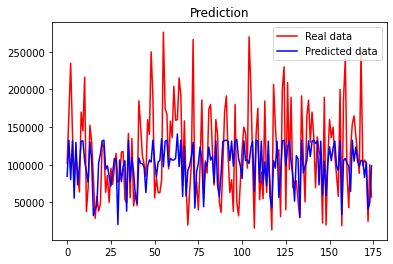

In [ ]:
#Check the model
y_pred = model4.predict(X_test)
df_pf4 = pd.DataFrame(model4.predict(X_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)
df_pf4['Target'] = y_test
df_pf4['Residual'] = df_pf4['Target'] - df_pf4['Prediction']
df_pf4['APE'] = np.absolute(df_pf4['Residual']/df_pf4['Target']*100) # Difference%
print()
print("MAPE =", round(np.mean(df_pf4['APE']), 2))
print()
print("Accuracy =", round(100-np.mean(df_pf4['APE']), 2))
print()
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

# Variable Sensitivity Analysis

In [ ]:
X_test.to_excel("X_test_sentivity.xlsx")

In [ ]:
test_company_location = pd.read_excel("/content/X_test_sentivity - company_location.xlsx", index_col=0)
test_company_size = pd.read_excel("/content/X_test_sentivity - Company_size.xlsx", index_col=0)
test_employee_residence = pd.read_excel("/content/X_test_sentivity - employee_residence.xlsx", index_col=0)
test_experience_level = pd.read_excel("/content/X_test_sentivity - experience_level.xlsx", index_col=0)
test_job_title = pd.read_excel("/content/X_test_sentivity - job_title.xlsx", index_col=0)
test_remote_ratio = pd.read_excel("/content/X_test_sentivity - remote_ratio.xlsx", index_col=0)

In [ ]:
sensitivity_analysis = pd.DataFrame(model2.predict(X_test.iloc[:23]), columns=['Original Prediction'])
sensitivity_analysis['Company Location'] = model2.predict(test_company_location)
sensitivity_analysis['Company Size'] = model2.predict(test_company_size)
sensitivity_analysis['Employee Residence'] = model2.predict(test_employee_residence)
sensitivity_analysis['Experience Level'] = model2.predict(test_experience_level)
sensitivity_analysis['Job Title'] = model2.predict(test_job_title)
sensitivity_analysis['Remote Ratio'] = model2.predict(test_remote_ratio)
sensitivity_analysis

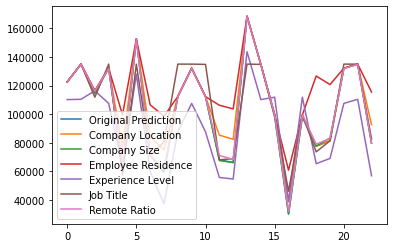

In [ ]:
sensitivity_analysis.plot.line()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f620667f750>,
      dtype=object)

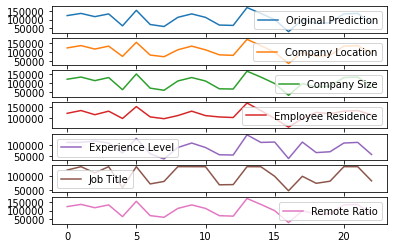

In [ ]:
sensitivity_analysis.plot(subplots=True)

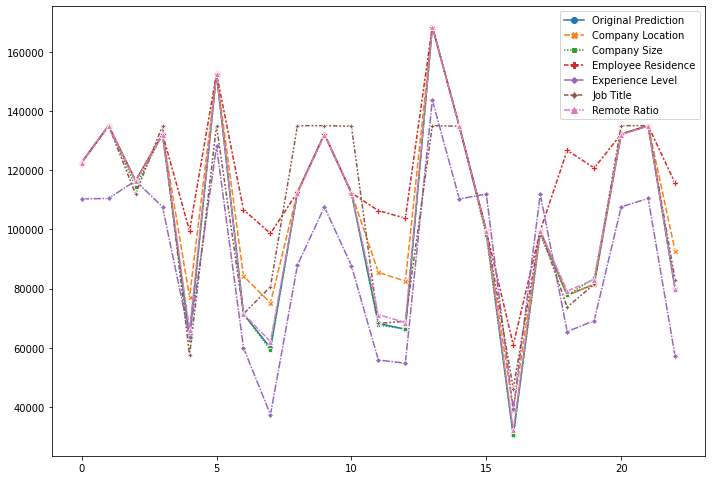

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=sensitivity_analysis, markers=True, legend="full")

In [ ]:
test_company_location_europa = pd.read_excel("/content/X_test_sentivity - company_location Europe.xlsx", index_col=0)
test_company_location_asia = pd.read_excel("/content/X_test_sentivity - company_location Asia.xlsx", index_col=0)
test_company_location_oceania = pd.read_excel("/content/X_test_sentivity - company_location Oceania.xlsx", index_col=0)
test_company_location_africa = pd.read_excel("/content/X_test_sentivity - company_location Africa.xlsx", index_col=0)

In [ ]:
sensitivity_analysis_company_location = pd.DataFrame(model2.predict(X_test.iloc[:23]), columns=['Original Prediction'])
sensitivity_analysis_company_location['Company Location America'] = model2.predict(test_company_location)
sensitivity_analysis_company_location['Company Location Europe'] = model2.predict(test_company_location_europa)
sensitivity_analysis_company_location['Company Location Asia'] = model2.predict(test_company_location_asia)
sensitivity_analysis_company_location['Company Location Oceania'] = model2.predict(test_company_location_oceania)
sensitivity_analysis_company_location['Company Location Africa'] = model2.predict(test_company_location_africa)
sensitivity_analysis_company_location

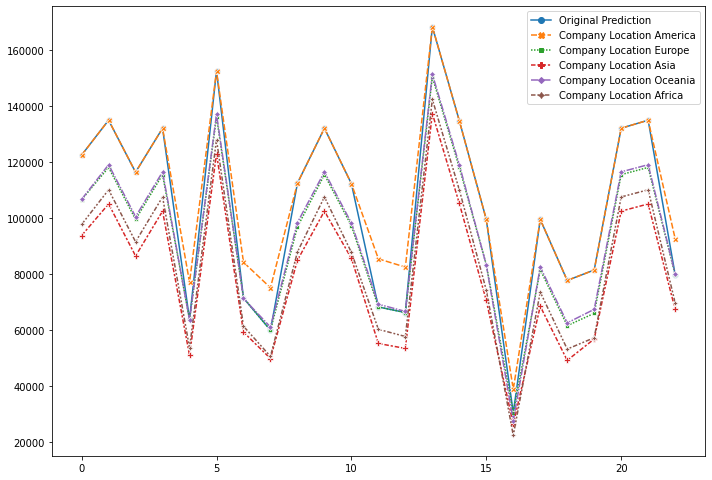

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=sensitivity_analysis_company_location, markers=True, legend="full")

In [ ]:
test_company_company_sizeS = pd.read_excel("/content/X_test_sentivity - Company_size0.xlsx", index_col=0)
test_company_company_sizeL = pd.read_excel("/content/X_test_sentivity - Company_size2.xlsx", index_col=0)

In [ ]:
sensitivity_analysis_company_size = pd.DataFrame(model2.predict(X_test.iloc[:23]), columns=['Original Prediction'])
sensitivity_analysis_company_size['Company Size S'] = model2.predict(test_company_company_sizeS)
sensitivity_analysis_company_size['Company Size M'] = model2.predict(test_company_size)
sensitivity_analysis_company_size['Company Size L'] = model2.predict(test_company_company_sizeL)
sensitivity_analysis_company_size

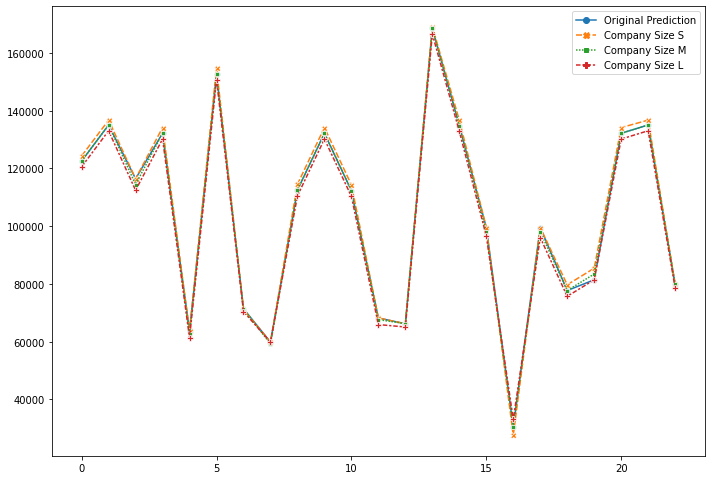

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=sensitivity_analysis_company_size, markers=True, legend="full")

In [ ]:
test_employee_residence_Africa = pd.read_excel("/content/X_test_sentivity - employee_residence Africa.xlsx", index_col=0)
test_employee_residence_Asia = pd.read_excel("/content/X_test_sentivity - employee_residence Asia.xlsx", index_col=0)
test_employee_residence_Europe = pd.read_excel("/content/X_test_sentivity - employee_residence Europe.xlsx", index_col=0)
test_employee_residence_Oceania = pd.read_excel("/content/X_test_sentivity - employee_residence Oceania.xlsx", index_col=0)


In [ ]:
sensitivity_analysis_emp_residence = pd.DataFrame(model2.predict(X_test.iloc[:23]), columns=['Original Prediction'])
sensitivity_analysis_emp_residence['Employee Residence America'] = model2.predict(test_employee_residence)
sensitivity_analysis_emp_residence['Employee Residence Africa'] = model2.predict(test_employee_residence_Africa)
sensitivity_analysis_emp_residence['Employee Residence Asia'] = model2.predict(test_employee_residence_Asia)
sensitivity_analysis_emp_residence['Employee Residence Europa'] = model2.predict(test_employee_residence_Europe)
sensitivity_analysis_emp_residence['Employee Residence Oceania'] = model2.predict(test_employee_residence_Oceania)
sensitivity_analysis_emp_residence

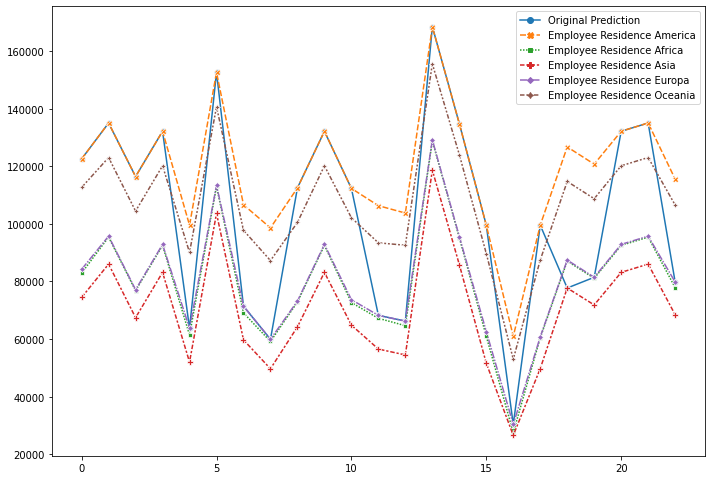

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=sensitivity_analysis_emp_residence, markers=True, legend="full")

In [ ]:
test_experience_levelEN = pd.read_excel("/content/X_test_sentivity - experience_level EN.xlsx", index_col=0)
test_experience_levelEX = pd.read_excel("/content/X_test_sentivity - experience_level EX.xlsx", index_col=0)
test_experience_levelSE = pd.read_excel("/content/X_test_sentivity - experience_level SE.xlsx", index_col=0)


In [ ]:
sensitivity_analysis_exp = pd.DataFrame(model2.predict(X_test.iloc[:23]), columns=['Original Prediction'])
sensitivity_analysis_exp['Experience Level MI'] = model2.predict(test_experience_level)
sensitivity_analysis_exp['Experience Level EN'] = model2.predict(test_experience_levelEN)
sensitivity_analysis_exp['Experience Level EX'] = model2.predict(test_experience_levelEX)
sensitivity_analysis_exp['Experience Level SE'] = model2.predict(test_experience_levelSE)
sensitivity_analysis_exp

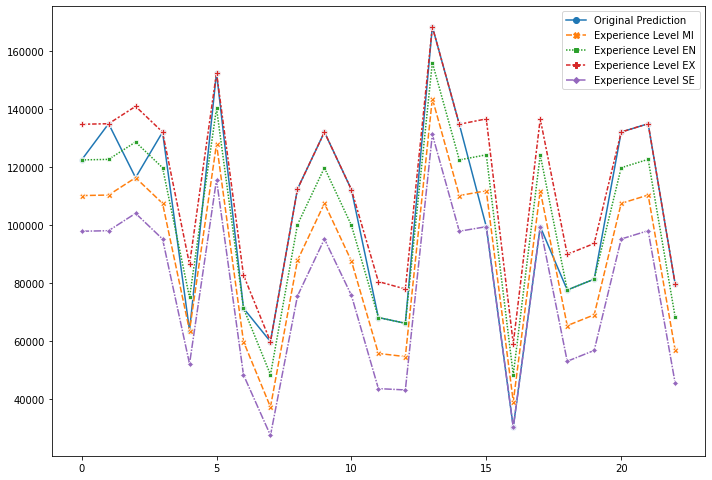

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=sensitivity_analysis_exp, markers=True, legend="full")

In [ ]:
test_remote_ratio50 = pd.read_excel("/content/X_test_sentivity - remote_ratio 50.xlsx", index_col=0)
test_remote_ratio100 = pd.read_excel("/content/X_test_sentivity - remote_ratio 100.xlsx", index_col=0)

In [ ]:
sensitivity_analysis_rr = pd.DataFrame(model2.predict(X_test.iloc[:23]), columns=['Original Prediction'])
sensitivity_analysis_rr['Remote Ratio 0'] = model2.predict(test_remote_ratio)
sensitivity_analysis_rr['Remote Ratio 50'] = model2.predict(test_remote_ratio50)
sensitivity_analysis_rr['Remote Ratio 100'] = model2.predict(test_remote_ratio100)
sensitivity_analysis_rr

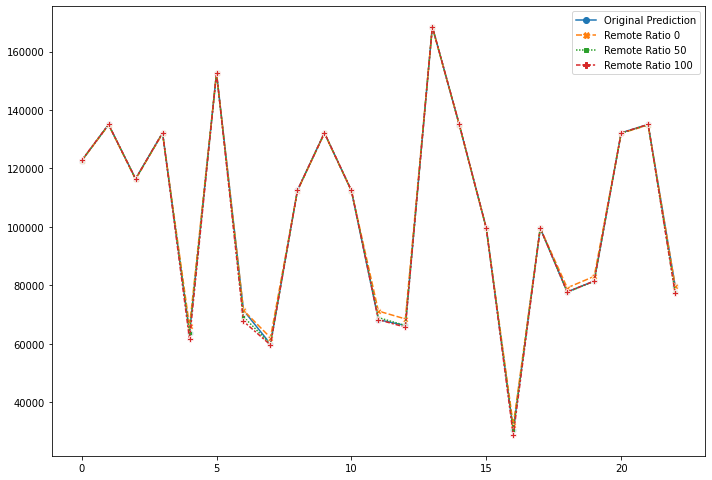

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=sensitivity_analysis_rr, markers=True, legend="full")

In [ ]:
test_job_titleAIScientist = pd.read_excel("/content/X_test_sentivity - job_title_AIScientist.xlsx", index_col=0)
test_job_titleAnalystEngineer = pd.read_excel("/content/X_test_sentivity - job_title_AnalystEngineer.xlsx", index_col=0)
test_job_titleDataAnalyst = pd.read_excel("/content/X_test_sentivity - job_title_DataAnalyst.xlsx", index_col=0)
test_job_titleDataArchitect = pd.read_excel("/content/X_test_sentivity - job_title_DataArchitect.xlsx", index_col=0)
test_job_titleDataEngineer = pd.read_excel("/content/X_test_sentivity - job_title_DataEngineer.xlsx", index_col=0)
test_job_titleDataScienceManager = pd.read_excel("/content/X_test_sentivity - job_title_DataScienceManager.xlsx", index_col=0)
test_job_titleMLEng = pd.read_excel("/content/X_test_sentivity - job_title_MLEng.xlsx", index_col=0)
test_job_titleMLScientist = pd.read_excel("/content/X_test_sentivity - job_title_MLScientist.xlsx", index_col=0)
test_job_titleother = pd.read_excel("/content/X_test_sentivity - job_title_other.xlsx", index_col=0)
test_job_titleResearchScientist = pd.read_excel("/content/X_test_sentivity - job_title_ResearchScientist.xlsx", index_col=0)

In [ ]:
sensitivity_analysis_jobtitle = pd.DataFrame(model2.predict(X_test.iloc[:23]), columns=['Original Prediction'])
sensitivity_analysis_jobtitle['Data Scientist'] = model2.predict(test_job_title)
sensitivity_analysis_jobtitle['AI Scientist'] = model2.predict(test_job_titleAIScientist)
sensitivity_analysis_jobtitle['Analyst Engineer'] = model2.predict(test_job_titleAnalystEngineer)
sensitivity_analysis_jobtitle['Data Analyst'] = model2.predict(test_job_titleDataAnalyst)
sensitivity_analysis_jobtitle['Data Architect'] = model2.predict(test_job_titleDataArchitect)
sensitivity_analysis_jobtitle['Data Engineer'] = model2.predict(test_job_titleDataEngineer)
sensitivity_analysis_jobtitle['Data Science Manager'] = model2.predict(test_job_titleDataScienceManager)
sensitivity_analysis_jobtitle['ML Engineer'] = model2.predict(test_job_titleMLEng)
sensitivity_analysis_jobtitle['ML Scientist'] = model2.predict(test_job_titleMLScientist)
sensitivity_analysis_jobtitle['Other'] = model2.predict(test_job_titleother)
sensitivity_analysis_jobtitle['Research Scientist'] = model2.predict(test_job_titleResearchScientist)
sensitivity_analysis_jobtitle

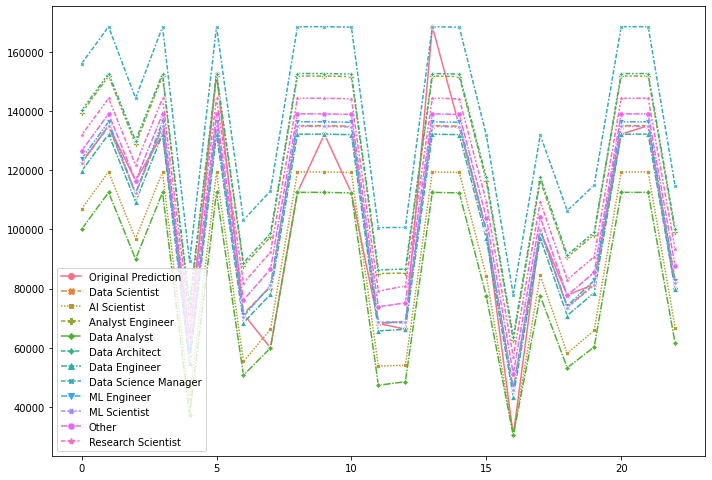

In [ ]:
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.lineplot(data=sensitivity_analysis_jobtitle, markers=True, legend="full")